<h1><b> DSC 170: Lecture 2. Intro to Geopandas.</b></h1>

This notebook will demonstrate several elementary GeoPandas functions:
 - reading a shapefile
 - plotting a map
 - creating a choropleth map based on some attribute
 - joining an external data file to a map
 - adding layers to a map
 - creating interactive maps
 
 
We will use several new libraries in this class. There will be many new functions. To get descriptions of functions and arguments press Shift-Tab (several times for more info). To see which methods are available for a class, press Tab after a dot.

__Later in the notebook, threre is a link to Google slides. They cover some key notions of map design and the use of graphic variables. We will walk through them in the lecture; this material will be on a quiz. Please explore other links in the lecture as well.__

## What is Geopandas

Geopandas == Pandas + geometric data types, and indexes and spatial operations defined over them.

Geopandas is designed to work seamlessly with other popular data science libraries, such as Pandas, NumPy, and Matplotlib. This means that you can easily integrate spatial data with other types of data and perform analysis on them together.

Geopandas adds vector geometry and spatial operations to Pandas. It integrates with several open source libraries for specific operations: **fiona** for reading and writing files, **shapely** for geometric operations, **pyproj** for coordinate conversion, **mapclassify** (formerly a part of PySAL) for (some) thematic mapping, **folium** (and other similar packages)for interactive mapping, **rasterio** for raster manipulations, **rtree** for spatial indexing.


More about the open-source ecosystem around Geopandas: https://geopandas.org/en/stable/community/ecosystem.html

Also see http://millermountain.com/geospatialblog/2021/08/17/what-can-geopandas-do-for-you/

### When to use and not to use Geopandas

Best for: exploratory data analysis with Jupyter notebooks, esp. if you are familiar with Pandas.

Not good for: 
   - when you need to produce publishable maps (specialized graphic packages would work better, but integration with mapclassify and similar packages helps.)
   - when you need to process raster data, or network data (but integrates with rasterio and rioxarray for rasters, with  osmnx and networkx for network analysis, etc.)
   - when you need to work with very large datasets: Geopandas is designed to work with relatively small to medium-sized datasets. For larger data - might turn to dask and dask-geopandas.
   - when you need to work with real-time data: Geopandas is designed for working with static data. 
   - when you need advanced spatial analysis capabilities: if you need more specialized or advanced spatial analysis tools, you might want to consider using a different library or software, such as ArcGIS.


Geopandas improved significantly over the last few years. It is much faster, and interoperates with other packages better. Of course, still need to be careful with working across multiple coordinate systems, and with invalid geometries.


## Geopandas, and standard vector primitives 

**Geopandas** is a package used to process vector spatial data - though it can be used in conjunction with raster libraries such as rasterio. **Vector** data are typically used to represent discrete geometric objects which can be modeled as points, lines and polygons. By contrast, **raster** representations are often used to show continuously varying fields, where we can measure or estimate a value at any given location. Some spatial data structures (e.g., TIN) don't fall into this simplistic classification - but we'll cover them later.

Some of the most common types of planar vector entities include Points, Lines, Polygons, and their multipart varieties: Multi-Points, Multi-Lines, Multi-Polygons.  These  types are defined in OGC Simple Features spec, also adopted as ISO 19125 (https://en.wikipedia.org/wiki/Simple_Features). 

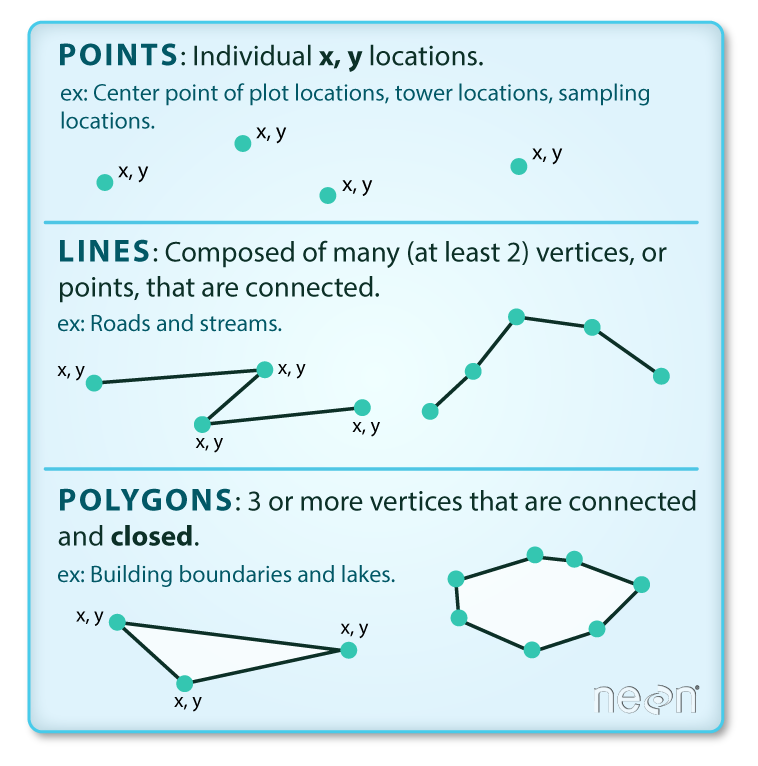 (Image Source: NEON)

**New terms:**

**Open Geospatial Consortium** (OGC, https://www.opengeospatial.org/): international consortium of ~ 500 organizations, to develop open geospatial standards.

**International Organization for Standardization** (ISO, https://www.iso.org): develops and publishes international standards.

The multipart varieties are used for entities that cannot be described by a single geometric primitive. For example, the state of Michigan is composed of two distinct peninsulas, and is often represented as Multi-Polygon. Regardless of the complexity of the underlying geometry, it is still a single feature.

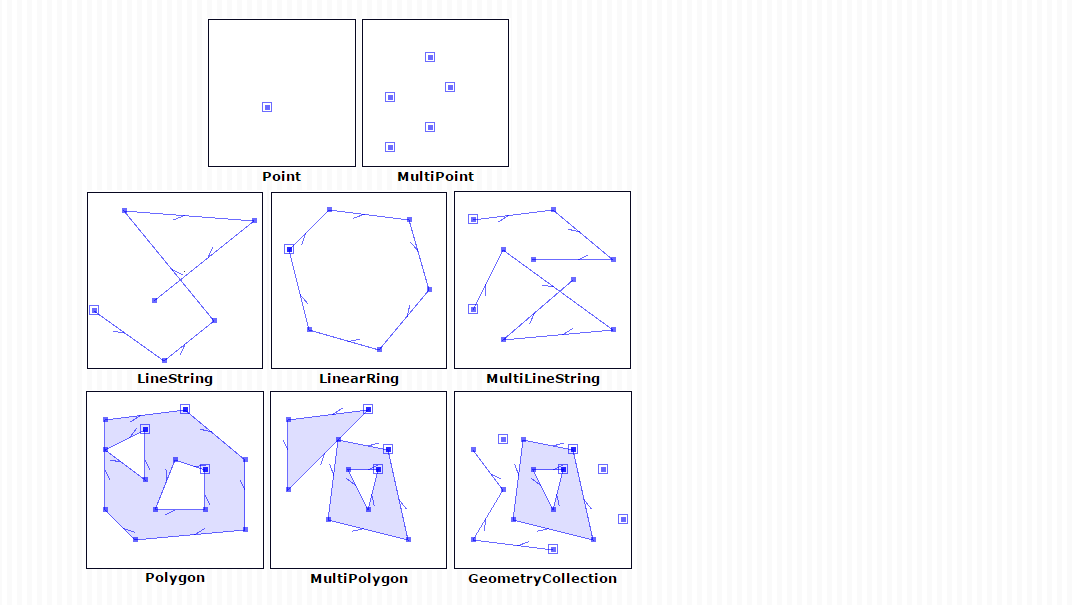 

Whether spatial objects are represented as single or multipart geometries often depends on how the measurements were done (what Nich Chrisman referred to as "measurement frameworks" - see http://www.dartmouth.edu/~remsense/lecture_notes/01_process/frameworks.html). If you start with a list of named locations and then delineate their boundaries, you often end up with multipart objects. If you start with object geometries (eg, delineated from remote sensing imagery) and then give them labels, you end up with singlepart objects. Fortunately, it is easy to convert between single-part and multi-part representations.

There are also mixed collections (a Geometry Collection may include items of all dimensional types) - but most software packages don't work with them, and there is a limited set of operations you can do over such collections. 



### Import geopandas, check the version

Note that the environment is already set up for you on the DSC170 container(s) in the datahub.
If you want to run it locally, we'll provide install instructions - but you are on your own. The class environment has many packages, and you may run into conflicting versions.

Running the lecture notebooks and working on assignments in a virtual environment is strongly recommended! See https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html#

In [1]:
# %matplotlib inline 

# the two lines below are a temporary fix, because of minor incompatibility warning
# import os
# os.environ['USE_PYGEOS'] = '0'


import geopandas # to be able to see maps
import pandas as pd

import os
current_dir = os.getcwd()
print(current_dir)
geopandas.__version__

/Applications/SynologyDrive/Courses/DSC 170


'0.14.1'

### Reading data into geopandas

Pandas uses __Series__; Geopandas uses __GeoSeries__, which is geometry column plus __index__.   The types of geometric objects that can be in the geometry column are Point, Line, Polygon, and their multipart extensions. **While a GeoSeries can mix geometric objects of different dimensions in one column, this is not recommended!!** Some operations won't work.

Reading data into Geopandas, using **read_file** from a shapefile. (can also read from URLs)

What is a **shapefile**? See https://en.wikipedia.org/wiki/Shapefile and https://gisgeography.com/arcgis-shapefile-files-types-extensions/

Not the most convenient way to exchange spatial data. It has several shortcomings that you should be aware of!

In [2]:
# set data location (uncomment one of them)
data_location = os.environ["HOME"]+"/public/datasets/"  # in the shared datahub 

# data_location = "../../8. Data/"    # on my local install

In [3]:
# Reading a shapefile into geopandas (the example I used before...)

shpFileIn = data_location +"other/ZipCodes.shp"

utah_zip = geopandas.read_file(shpFileIn)

# this shapefile contains zip codes of Utah


DriverError: /Users/jialinhu/public/datasets/other/ZipCodes.shp: No such file or directory

In [ ]:
utah_zip

In [ ]:
# Reading ZIP Code coundaries, San Diego, into geopandas
# source: San Diego County Open Data Portal
# https://data.sandiegocounty.gov/Maps-and-Geographical-Resources/Zip-Codes/vsuf-uefy
# Exported as shapefile 12/13/21

shpFileIn = data_location +"sandiego/ZipCodes/geo_export_4cffd5d9-200a-4e2d-abd0-7904bc10857a.shp"

sd_zip = geopandas.read_file(shpFileIn)



In [ ]:
# on the datahub, you can explore other sample datasets:

! ls -ltr ../../../../public/datasets/sandiego

# On a Windows box, use
# ! dir "../../8. Data/" 

### Explore the content of geopandas geodataframe

In [ ]:
# Let's explore the "geometry" column
# utah_zip.head(50)

sd_zip.head(50)

Geopandas data frame includes a __geometry__ column, which contains vector coordinates of standard types of shapes.

Notice that here geometry is presented as text, in the so called __Well-Known Text (WKT)__ format, also specified by OGC and ISO (https://en.wikipedia.org/wiki/Well-known_text_representation_of_geometry). 

<b>Another thing you should notice: the same zip code may be shown as more than one record.</b>

Typically, to add attribute data to it (e.g., population) you'd need to transform this dataframe such that each zip code becomes a single record. 


### Reading geojson from a URL into a geodataframe

The read_file method knows a lot of input formats, thanks to GDAL/OGR (https://www.gdal.org/) wrapped in __fiona__.

GeoJSON is a geographic data interchange format that represents geographical features as a collection of JSON objects. It is based on Geographic Markup Language (GML), which is an XML-based format for encoding geospatial data, standardized by OGC. 

GeoJSON is lightweight and easy-to-parse format; it is often used to store and transmit spatial data in web applications. It is not a good choice for storing large datasets.

When you might use GeoJSON:

    - Storing and sharing small to medium-sized datasets that contain spatial datas.
    - Working with spatial data in web applications; it is supported by many web mapping libraries.
    - Exchanging data with other systems in a standard way


Here is how you read a GeoJSON file from a URL (see http://geojson.xyz/). This website is a useful collection of files that are easy to import.


In [ ]:
# For example, retrieve US state polygons ("admin 1" level units) from geojson.xyz

url = "https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_110m_admin_1_states_provinces_shp.geojson"

# url = "https://raw.githubusercontent.com/fahimreza-dev/bangladesh-geojson/master/bangladesh.geojson"

# Or, retrieve Populated Places (uncomment the next line to try)https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_50m_populated_places.geojson

# url = "https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_50m_populated_places_simple.geojson"
geojson_example = geopandas.read_file(url)

# and this is how you plot the geodataframe:
geojson_example.plot()

# writing files is similar: 
# utah_zip.to_file('zipcodes_utah.shp') 

GeoJSON uses the same set of graphic primitives described above: see https://en.wikipedia.org/wiki/GeoJSON and http://geojson.org. 

Useful sources of geojson files are: 
1. http://geojson.io (to create and view small GeoJSON files), 
1. https://github.com/datasets/geo-countries/blob/master/data/countries.geojson, and 
1. https://datahub.io/core/geo-countries (countries in GeoJSON), 
1. https://catalog.data.gov/dataset (US government data), 
1. http://geojson.xyz (random spatial datasets).

You may need those for projects!

Shapefiles is one of the most widely used  file formats. KML is another common one. But there are many others. See https://en.wikipedia.org/wiki/GIS_file_formats for a more complete list. Importing different formats into your project, and transforming them for use with your other data, is a big part of what GIS people do. 

###  Format translations for spatial data

In the Open Source world, __OGR__ deals with vector data format translation (while __GDAL__ deals with raster data). They are wrapped by __fiona__, which is what Geopandas rely on for reading and saving files (https://github.com/Toblerity/Fiona)  

In the future, fiona will be replaced by pyogrio (see https://geopandas.org/en/stable/docs/user_guide/io.html)

### Geopandas vs Pandas: refresh your pandas knowledge

In [ ]:
# how many records are in the dataframe
sd_zip.length

# what are other ways to find the number of records in a dataframe? A few more are added by Geopandas.

In [ ]:
sd_zip.geometry

Notice that the records here have unique ZIP5 values. 
See about zip codes at https://en.wikipedia.org/wiki/ZIP_Code ("Zone Improvement Plan", 5-digit zip codes in use since 1963).

Often, US administrative records are referenced by **FIPS Codes**. FIPS codes are used in many areas, not only as place codes.

### Working with a single record in a geodataframe

In [ ]:
print(sd_zip.loc[0, 'community'])  # returns community name of the first zip
print(sd_zip.loc[0, 'geometry']) # returns geometry content of the first zip 
sd_zip.loc[0, 'geometry'] # plots the geometry


### A brief pandas quiz...

1. Guess what these operations do?
2. Which of them would generate an error?
3. Which two would produce the same result (almost)
4. What will happen if we just run this cell?

In [ ]:
sd_zip.iloc[0:20].plot()  #1

sd_zip.loc[122].plot()   #2

sd_zip.loc[121:122].plot()  #3

sd_zip.loc[list({0,5,10,15,20})].plot()  #4       By the way: df.loc[{0,1,2,3,4...}].plot() also works, for now

sd_zip.loc[sd_zip['shape_star']> 5000000000].plot()  #5

sd_zip.loc[121, 'geometry']  #6


## Let's create a map!

### Simple single-symbol plot, and spatial indexes

In [ ]:
# PLOT will create a map using the Geometry column, and values in an attribute column

# Single symbol map
sd_zip.plot(figsize=(10,10))

In [ ]:
# map fragment: draw zip codes with coordinates south of 32.8 latitude
# cx is a coordinate-based indexer, in addition to standard Pandas indexes.

# cx works over bounding boxes for each object: returns geometries that intersect a bounding box

south_sd = sd_zip.cx[:,:32.8]

south_sd.plot(figsize=(10,10))

#### What are standard indexes in pandas? 

### Bounding box

New Term: **Bounding Box** (BBOX), also "minimum bounding rectangle (MBR)", "envelope": max extent of a 2D object in a given projection. Defined by minx, maxx, miny, maxy.
Commonly used for spatial indexing (to optimize spatial search and map drawing); as part of metadata (to indicate spatial extent of the area covered by the spatial dataset); for a simple query. 

Experiment with bounding boxes at https://boundingbox.klokantech.com/


In [ ]:
sd_zip.total_bounds

### Choropleth maps

Choropleth maps show distribution of a variable by pre-defined spatial units (areas) using colors or pattern fills. Each area is symbolized relative to the value of the variable. 

Choropleth map is a type of thematic map. By contrast, a reference map shows location and names of spatial features, typically physical or cultural features. See more about different types of maps: https://101gis.com/reference-map-vs-thematic-map/ 

#### When you might use choropleth maps:
    - Visualizing the distribution of a continuous or ordinal variable (population density, GDP per capita, voting patterns, etc.)
    - Comparing the spatial patterns of a variable between different geographic regions or over time.
    - Communicating the distribution of a variable to a broad audience: they can be easily understood by people with little knowledge of maps.

Be careful: Choropleth maps are best suited for mapping ratio data, rather than absolute data. Ratio data represents a relationship between two quantities, where the ratio between the two quantities is meaningful. For example, population density is a ratio, as it represents the number of people per unit of land area. 

On the other hand, absolute data represents a quantity without any context or comparison. For example, the total population of a country is an absolute value, as it does not convey any information about the size of the country. This may result in a misleading map. For example, a large and sparcely populated area may appear more prominently than a smaller area with high population density. That would present a distorted view of population distribution



In [ ]:
# recall the columns in this geodataframe:
sd_zip

In [ ]:
# if we want to show values for a specific column, add "column = " to the plot statement
# most maps would need a legend

sd_zip.plot(column='community', figsize=(10,10), legend = True)

# what if you use a different column, such as 'community'? Experiment. Is this a choropleth map?
# For categorical variables, it simply assigns a different color hue to different values. 
# The goal is to show qualitative differences  - so color value or saturation not to be used.
# Adding  categorical=True isn't really critical here. 
# Don't use a sequential color map for categorical variables (eg no cmap='OrRd')

# sd_zip.plot(column='community', figsize=(10,10), legend = True, categorical=True)


In [ ]:
# Customize the choropleth map: specify a color map and add a legend for a numeric variable
sd_zip.plot(column='shape_star', figsize=(10,10), cmap='hot', legend=True)

# Color maps are in https://matplotlib.org/users/colormaps.html (try hot, ocean, flag, terrain; Accent for categorical maps)

In [ ]:
# OR the same for length:

sd_zip.plot(column='shape_stle', figsize=(10,10), legend = True)



#### What is suspicious about mapping this variable?

See https://en.wikipedia.org/wiki/Coastline_paradox 



### How different choropleth map classifications result in different perception of the map


__Choropleth maps__ is a very common way to start data analysis where data are summarized and presented by areal units. However, the message of the map will be different depending on what classification (clustering) method you chose. The range of values can be split into intervals that are equal in size ('equal_intervals'), or have approximately the same number of items in each interval (equal frequency, or 'quantiles'), or follow natural breaks in the distribution (some form of discriminant analysis, or optimal arrangement of values into classes. Basically, k-means clustering). See https://en.wikipedia.org/wiki/Jenks_natural_breaks_optimization; https://en.wikipedia.org/wiki/Choropleth_map 

How to select colors for a choroleth map: http://colorbrewer2.org/

### Basic cartographic principles. Map design. Types of maps. Graphic variables

__Let's look at the [slides](https://docs.google.com/presentation/d/1eSoAApw3DA5Mjob9H9xLywMsQFzi8Fps2mInMCkWIts/edit?usp=sharing) again!__

Advanced packages use "smart mapping" these days, e.g. https://developers.arcgis.com/python/guide/smart-mapping/

In [ ]:
# Let's explore how different classification methods change the appearance of a map

import mapclassify # previously component of PySAL

# Specifying classification sheme requires an additional library (originally a component of PySAL)
sd_zip.plot(column='shape_star', cmap='OrRd', scheme ='equal_interval', k=6, legend=True)
sd_zip.plot(column='shape_star', cmap='OrRd', scheme ='fisher_jenks', k=5, legend=True)
sd_zip.plot(column='shape_star', cmap='OrRd', scheme ='quantiles', k=5, legend=True)

In [ ]:
# let's see how the values are clustered:
import seaborn as sns  # This allows us to easily and beautifully plot distributions
sns.displot(sd_zip['shape_star'], rug=True, kde=False)

# Let's try: Quantiles, EqualInterval, FisherJenks, NaturalBreaks

allbins = mapclassify.Quantiles(sd_zip['shape_star'], k=5)

# e.g.
# allbins = mapclassify.Quantiles(sd_zip['shape_star'], k=5)


allbins

### The  .explore() method added in geopandas 0.10

Creates an interactive map based on GeoPandas and folium/leaflet.js

In [ ]:
utah_zip.explore()

In [ ]:
sd_zip.explore()

In [ ]:
# can customize, using Folium and mapclassify parameters
sd_zip.explore(column="shape_star", cmap ="Blues", scheme="FisherJenks", tiles = "CartoDB dark_matter", 
                 tooltip={"community","zip", "shape_star"}, popup=True,k=6, highlight=True,
                 width="50%", legend_kwds={"caption":"San Diego Zip Codes", "colorbar":False})

Think about the message of your map when you select symbology!

### Joining geography and attributes


Now, let's look at another very common situation. To create a map, you often need to join geography and attribute data. Boundaries, lines, or point locations may come from a spatial data source and would contain some identifier for each record. Suppose these IDs (or some function of these IDs) match with IDs in another table. These could be country names or ISO codes; Zip codes, FIPS codesm names of natural features, etc. Then you need to join the two tables (one with geometry, another without).

In [ ]:
# Let's look at a world map, and explore the table structure behind it

# This file comes from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
# It used to come pre-installed with Geopandas, but deprecated as of version 1.0. 
# So, I downloaded it and added to /public/world

naturalearth_lowres = data_location +"world/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp"
world = geopandas.read_file(naturalearth_lowres)

wmap = world.plot()
wmap.set_title("World Map")

In [ ]:
world.head()

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
world.head()

In [ ]:
# remove areas we are not interested in:

world = world[(world.POP_EST>0) & (world.ADMIN!= 'Antarctica')]

world.plot()

In [ ]:
# now, let's import an Excel file with some data
# the source of the data is: http://sdgindex.org/reports/2018/ 
# (Citation: Sachs, J., Schmidt-Traub, G., Kroll, C., Lafortune, G., Fuller, G. (2018): 
# SDG Index and Dashboards Report 2018. New York: Bertelsmann Stiftung and Sustainable Development Solutions Network (SDSN).)
# see these data in SuAVE: http://suave2.sdsc.edu/main/file=suavedemos_SDG_Indicators_2018.csv&view=bucket

country_data = pd.read_excel(data_location +'world/Global_Index_Data.xlsx')

# let's list variables in the file
list(country_data)

In [ ]:
country_data.head()

In [ ]:
# we can plot variables that are already in the geodataframe, but there are only a few (pop_est, gdp_md_est)
world.plot(column='POP_EST', cmap='OrRd', k=5, legend=True)



In [ ]:
# Now we can do better!

world.explore(column="POP_EST", cmap ="OrRd", tiles = "CartoDB positron", 
                 popup=True,k=10, highlight=True,legend=True, scheme="FisherJenks",
                 width="70%", legend_kwds={"caption":"Population estimates", "colorbar":False})



In [ ]:
# or we can map any variable that is in the Excel file, once we join it to the shapes.
# notice that 'iso_a3' in the shapefile should match 'id' in the excel file (this is a 3-letter country code)
# so we can join the two tables using "merge"

merged_df = pd.merge(world, country_data, left_on='ADM0_A3', right_on='id',how='inner', indicator=True)



In [ ]:
merged_df.head()

### Types of joins

Notice the types of join: inner, outer, left, right. 

Here, we are joining gdf (left) with df (right).

- Inner: only keep rows where the merge “on” value exists in both the left and right dataframes (the default).
- Left: keep every row in the left dataframe. Add NaN or empty for missing values in the result.
- Right: keep every row in the right dataframe. Add NaN or empty for missing values in the result.
- Outer: keep every row in both left and right dataframes. Add NaN or empty for missing values in the result.

You may want to add indicator = True to create a "_merge" column.

More resources: 
- https://chrisalbon.com/python/data_wrangling/pandas_join_merge_dataframe/; 
- http://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html; 
- https://www.youtube.com/watch?v=XMjSGGej9y8 



In [ ]:
# now, let's try to plot it

# world2 = merged_df.plot(column = 'Unemployment rate (%)', cmap='OrRd',legend=True, figsize=(20,20), k=5)

# world2.set_title("Unemployment rate (%)")

merged_df.explore(column="Unemployment rate (%)", cmap ="OrRd", tiles = "OpenStreetMap", 
                 popup=["NAME","CONTINENT"],k=8, highlight=True, tooltip=["NAME","Unemployment rate (%)"],
                 width="70%", legend=True, scheme="Quantiles",legend_kwds={"caption":"Unemployment", "colorbar":False})


In [ ]:
# Here is how you can save the output as an image (but for publication-quality images better use other tools)
# fig = world2.get_figure() 
# fig.savefig("output.png", dpi=300)

## Dissolve operation

DISSOLVE is another very common operaiton when creating maps by areal units. Often, neighboring units have the same value, and the boundary between them is not needed. This is when you use DISSOLVE to aggregate such neighboring geometries with the same value. DISSOLVE removes interior boundaries of a set of polygons with the same attribute value and creates one new combined polygon.

When to use DISSOLVE:

     - to simplify a map by reducing the number of features and reduce visual clutter on a map.
     - to analyze data by aggregate features.
     - to create new features from existing ones, based on the the attribute values of the original features.
     - to clean up data, e.g. to remove gaps or overlaps between features, or to correct errors in the data.



In [ ]:
# Dissolving boundaries into larger areas
world2 = merged_df.plot(column = 'SUBREGION', figsize=(10,10))

In [ ]:
# create a new gdf with a subset of columns, and decide how to aggregate values in these columns (aggfunc)
# need at least three columns in the new gdf
cols = ['geometry','POP_EST','SUBREGION']
sub_regions = merged_df[cols].dissolve(by='SUBREGION', aggfunc = 'sum', as_index=False)
sub_regions.plot(figsize=(10,10), column = 'SUBREGION')

# aggfunc specifies how to compute attributes for the resultant polygons (first; last; min; max; sum; mean; median)

# Which non-spatial function is it similar to?

In [ ]:
# what do you expect to get as content of this merged_df?

sub_regions.head(50)

# notice that DISSOLVE is likely to generate many more multi-part geometries

## Maps as layered cakes of dataframes

Maps often show more than one variable, and these variables may represent different datasets or themes, shown with different types of geometries. **Organizing maps by layers of information is a very common approach in GIS and mapping.** 

Each layer in a map may correspond to a dataframe in which the rows represent individual features (such as roads, buildings, or points of interest) and the columns represent the attributes of those features (such as the name, type, or location of the feature).

When working with maps, you can add, remove, or modify the layers in the map to change the way the data is displayed or to focus on specific aspects of the data. You can also style the layers in the map to change the way the data is visualized, such as by changing the colors or symbols used to represent the features.

Note that when maps get a bit more complex, with multiple layers and different symbologies, you may want to have more control over the process. Composing the plot with matplotlib will give you more options. But overall: if you want production quality maps, do it in dedicated software.

### Adding a point layer of cities

Here, we will add a point layer of cities on top of the polygon layer.


In [ ]:
# Let's add some more data to the map, from the same website https://www.naturalearthdata.com/downloads/110m-cultural-vectors/

natearth_cities = data_location +"world/ne_110m_populated_places_simple/ne_110m_populated_places_simple.shp"
cities = geopandas.read_file(natearth_cities)

cities.plot(marker='*', color='green', markersize=8);

### Layering city points above polygons of world sub-regions

In [ ]:
world2 = merged_df.plot(column = 'SUBREGION', legend=True, figsize=(20,20))
cities.plot(ax=world2, marker='o', color='black', markersize=8);

# on this map, there is a base (world2), and cities are drawn on top of it

### Beautification: transparency, styling, etc.

In [ ]:
# Beautifications:

# transparency:
world2 = merged_df.plot(column = 'SUBREGION', legend=True, figsize=(20,20), alpha=0.2)
cities.plot(ax=world2, marker='o', color='black', markersize=50);

# remove axes:
world2 = merged_df.plot(column = 'SUBREGION', legend=True, figsize=(20,20), alpha=0.2)
cities.plot(ax=world2, marker='o', color='black', markersize=8);
world2.set_axis_off()

# specifying line styles:

world2 = merged_df.plot(column = 'SUBREGION', legend=True, figsize=(20,20), alpha=0.2, edgecolor='0.7', linewidth=3)
cities.plot(ax=world2, marker='*', color='black', markersize=8);
world2.set_axis_off()

# the map can be also plotted as matplotlib figure



### Representative points for polygons (these are not centroids!)

Now, let's create a proportional symbol map overlaid over a choropleth map. First, we need to define point locations to which we will attach country data. we'll use the same lowres world map, and create centroids for each country.

Representative points and centroids are two different ways to represent polygon features in a map.

__Representative points__ are points that are located within a polygon and are used to represent the polygon on a map. Representative points are often used to label polygons on a map, as they provide a more accurate representation of the polygon's location than the polygon's centroid. Representative points can also be used to create point data from polygon data, which can be useful for certain types of analysis.

__Centroids__, on the other hand, are points that are located at the center of a polygon. Centroids are often used to summarize the characteristics of a polygon, such as its area or perimeter. Centroids are also used to represent the polygon on a map when the precise location of the polygon is not important.

Use representative points when the precise location of the polygon is important and when the points needs to be within the polygon.

Use centroids when the precise location of the polygon is not important (e.g., a map may include polygon centroids but not the  polygon layer: no danger to have these point outside the polygons). 

In [ ]:
rep_points=world.copy()
rep_points = rep_points[(rep_points.POP_EST>0) & (rep_points.NAME!= 'Antarctica')]

rep_points['country_center'] = rep_points.representative_point()
# Geopandas ensures that the point is within the originating polygon
rep_points.head()

### Geodataframe can have several geometry columns, one of them active

In [ ]:
# Now, switch geometry from polygon to points (ie, set a new active geometry column)

rep_points = rep_points.set_geometry('country_center')
rep_points.plot()

### Proportional symbols over a choropleth map

Proportional symbols are symbols that are used to represent the magnitude of a numerical attribute on a map. The size of the symbol is proportional to the value of the attribute, with larger symbols representing larger values and smaller symbols representing smaller values.

Proportional symbols are commonly used when the data cannot be easily represented with other types of symbols such as choropleth maps. This is an appropriate way to show absolute values (recall that choropleth maps are good for ratio values.)

In [ ]:
# Here, we will create a map with two layers. 
# The base layer will show GDP per capita, as a choropleth map. 
# It is a good idea to use relative values (per capita, per area, i.e. density) for choropleth themes

world['gdp_per_cap'] = world['GDP_MD'] / world['POP_EST']

base = world.plot(figsize=(20,20), column='gdp_per_cap', alpha=1, cmap='OrRd')

# Population size of each country will be shown by proportional symbols. 
# When showing absolute valies, use this technique rather than choropleth

pop_max = rep_points['POP_EST'].max()
pop_min = rep_points['POP_EST'].min()

max_size = 2000
min_size = 2
rep_points.plot(ax=base, marker='o', color='black', markersize=min_size + (max_size-min_size)*(rep_points['POP_EST']/pop_max));

# notice that markersize is not a constant; it is now computed based on other values
# this is a very simple way to scale points; other scaling functions can be used

## Creating interactive multi-layer maps with Folium

In [ ]:
import folium
from folium.plugins import MarkerCluster
rep_points.head()


### Prepare point data for mapping

In [ ]:
rep_points.set_geometry('country_center')
rep_points.drop(['geometry'], axis=1, inplace=True)
rep_points.rename(columns={'country_center': 'geometry'}) # need to rename to avoid issues with other packages

### Set up a map in Folium

In [ ]:
map1 = folium.Map(location=[0, 0], zoom_start=2, tiles="cartodbpositron")
# pjson = cities.to_json()


pjson = rep_points.to_json()

rps = folium.features.GeoJson(pjson)
map1.add_child(rps)


map1

In [ ]:
# same, using MarkerCluster
map1 = folium.Map(location=[0, 0], zoom_start=2, tiles="cartodbpositron")
locations = []
for idx, row in cities.iterrows():
    locations.append([row['geometry'].y, row['geometry'].x])
    
map1.add_child(MarkerCluster(locations=locations))

### More about simple mapping with Folium

- https://python-visualization.github.io/folium/latest/user_guide/geojson.html (using the Choropleth class)


### Putting it all together

In [ ]:
# set the map center and zoom
map1 = folium.Map(location=[0, 0], zoom_start=2, tiles="cartodbpositron")

# Then you can simply pass a geodataframe to the Choropleth class, 
# and specify the key (in the geodataframe) to be used for mapping
# You can convert to json (eg wjson = world.to_json() ) and explore it to make sure that the key_on is set correctly.
# Because internally it uses GeoJson class


folium.Choropleth(
    geo_data=world,
    data=world,
    columns=['NAME','gdp_per_cap'],
    key_on='feature.properties.NAME',
    fill_color='YlGn',
    fill_opacity=0.9,
    line_weight=2,
#     bins=[0, 0.01, 0.02, 0.03, 0.05, 0.1, 0.2],
    legend_name='GDP per Capita',
    highlight=True, 
    nan_fill_color ='purple'
).add_to(map1)

map1.add_child(MarkerCluster(locations=locations))

map1

Check out folium examples at https://github.com/python-visualization/folium - they are cool!

Here is another good source: https://www.analyticsvidhya.com/blog/2020/06/guide-geospatial-analysis-folium-python/

Besides Folium, there are several new visualization libraries you can use in the notebooks. You may want to experiment with **[Kepler](../Lecture_additional_materials/Kepler/KeplerDemo.ipynb)** and ipyleaflet, and also with spatial libraries used in **[SuAVE](https://suave.sdsc.edu)**

In [ ]:
# A relatively new way to do this - using .explore()

newmap = merged_df.explore(column="Unemployment rate (%)", cmap ="OrRd", tiles = "OpenStreetMap", 
                 popup=["NAME","CONTINENT"],k=8, highlight=True, tooltip=["NAME","Unemployment rate (%)"],
                 width="70%", legend=True, scheme="Quantiles",legend_kwds={"caption":"Unemployment", "colorbar":False})


In [ ]:
newmap.add_child(MarkerCluster(locations=locations))
newmap
